In [1]:
import pandas as pd
import numpy as np

In [2]:
train_df = pd.read_csv('/home/monster/Downloads/kaggle/AV-L&T-loan/train.csv')
test_df = pd.read_csv('/home/monster/Downloads/kaggle/AV-L&T-loan/test.csv')
sub_df = pd.read_csv('/home/monster/Downloads/kaggle/AV-L&T-loan/sample_submission.csv')

In [3]:
train_df.shape,test_df.shape

((233154, 41), (112392, 40))

In [11]:
train_df['is_train'] = ''
test_df['is_train'] = ''
data = pd.DataFrame()
train_df.loc[:,'is_train'] = 1
test_df.loc[:,'is_train'] = 0
data = data.append(train_df,sort=False).append(test_df,sort=False)

In [26]:
data.reset_index(inplace=True)

In [14]:
#Treat missing values
#86 % values are no so it is safe to impute NO
data['Employment.Type'].fillna('Self_employed',inplace=True)

UniqueID                                 int64
disbursed_amount                         int64
asset_cost                               int64
ltv                                    float64
branch_id                                int64
supplier_id                              int64
manufacturer_id                          int64
Current_pincode_ID                       int64
Date.of.Birth                           object
Employment.Type                         object
DisbursalDate                           object
State_ID                                 int64
Employee_code_ID                         int64
MobileNo_Avl_Flag                        int64
Aadhar_flag                              int64
PAN_flag                                 int64
VoterID_flag                             int64
Driving_flag                             int64
Passport_flag                            int64
PERFORM_CNS.SCORE                        int64
PERFORM_CNS.SCORE.DESCRIPTION           object
PRI.NO.OF.ACC

In [15]:
data.apply(lambda x: sum(x.isnull()),axis=0)

UniqueID                                    0
disbursed_amount                            0
asset_cost                                  0
ltv                                         0
branch_id                                   0
supplier_id                                 0
manufacturer_id                             0
Current_pincode_ID                          0
Date.of.Birth                               0
Employment.Type                             0
DisbursalDate                               0
State_ID                                    0
Employee_code_ID                            0
MobileNo_Avl_Flag                           0
Aadhar_flag                                 0
PAN_flag                                    0
VoterID_flag                                0
Driving_flag                                0
Passport_flag                               0
PERFORM_CNS.SCORE                           0
PERFORM_CNS.SCORE.DESCRIPTION               0
PRI.NO.OF.ACCTS                   

In [16]:
#treat categorical variables
from sklearn.preprocessing import LabelEncoder

d = pd.DataFrame()

var_mod = ['Employment.Type','PERFORM_CNS.SCORE.DESCRIPTION']

le = LabelEncoder()
for i in var_mod:
    print(i)
    d[str(i)] = le.fit_transform(data.loc[:,i])
d.dtypes


Employment.Type
PERFORM_CNS.SCORE.DESCRIPTION


Employment.Type                  int64
PERFORM_CNS.SCORE.DESCRIPTION    int64
dtype: object

In [18]:
data.shape,d.shape

((345546, 42), (345546, 2))

In [19]:
data.loc[:,'Employment.Type'] = d.loc[:,'Employment.Type']
data.loc[:,'PERFORM_CNS.SCORE.DESCRIPTION'] = d.loc[:,'PERFORM_CNS.SCORE.DESCRIPTION']

In [28]:
data.dtypes[data.dtypes=='object']

Date.of.Birth            object
DisbursalDate            object
AVERAGE.ACCT.AGE         object
CREDIT.HISTORY.LENGTH    object
dtype: object

In [30]:
type(data['Date.of.Birth'][0])

str

In [31]:
type(data['DisbursalDate'][0])

str

In [32]:
type(data['AVERAGE.ACCT.AGE'][0])

str

In [33]:
type(data['CREDIT.HISTORY.LENGTH'][0])

str

In [43]:
train_df = data.loc[data['is_train']==1,:]
train_df = train_df.drop(['is_train'],axis=1)

In [51]:
test_df = data.loc[data['is_train']==0,:]
test_df = test_df.drop(['is_train','loan_default'],axis=1)

In [47]:
train_df.apply(lambda x: sum(x.isnull()),axis=0)

index                                  0
UniqueID                               0
disbursed_amount                       0
asset_cost                             0
ltv                                    0
branch_id                              0
supplier_id                            0
manufacturer_id                        0
Current_pincode_ID                     0
Date.of.Birth                          0
Employment.Type                        0
DisbursalDate                          0
State_ID                               0
Employee_code_ID                       0
MobileNo_Avl_Flag                      0
Aadhar_flag                            0
PAN_flag                               0
VoterID_flag                           0
Driving_flag                           0
Passport_flag                          0
PERFORM_CNS.SCORE                      0
PERFORM_CNS.SCORE.DESCRIPTION          0
PRI.NO.OF.ACCTS                        0
PRI.ACTIVE.ACCTS                       0
PRI.OVERDUE.ACCT

In [52]:
test_df.apply(lambda x: sum(x.isnull()),axis=0)

index                                  0
UniqueID                               0
disbursed_amount                       0
asset_cost                             0
ltv                                    0
branch_id                              0
supplier_id                            0
manufacturer_id                        0
Current_pincode_ID                     0
Date.of.Birth                          0
Employment.Type                        0
DisbursalDate                          0
State_ID                               0
Employee_code_ID                       0
MobileNo_Avl_Flag                      0
Aadhar_flag                            0
PAN_flag                               0
VoterID_flag                           0
Driving_flag                           0
Passport_flag                          0
PERFORM_CNS.SCORE                      0
PERFORM_CNS.SCORE.DESCRIPTION          0
PRI.NO.OF.ACCTS                        0
PRI.ACTIVE.ACCTS                       0
PRI.OVERDUE.ACCT

In [53]:
train_df.shape,test_df.shape

((233154, 42), (112392, 41))

In [54]:
train_df.columns

Index(['index', 'UniqueID', 'disbursed_amount', 'asset_cost', 'ltv',
       'branch_id', 'supplier_id', 'manufacturer_id', 'Current_pincode_ID',
       'Date.of.Birth', 'Employment.Type', 'DisbursalDate', 'State_ID',
       'Employee_code_ID', 'MobileNo_Avl_Flag', 'Aadhar_flag', 'PAN_flag',
       'VoterID_flag', 'Driving_flag', 'Passport_flag', 'PERFORM_CNS.SCORE',
       'PERFORM_CNS.SCORE.DESCRIPTION', 'PRI.NO.OF.ACCTS', 'PRI.ACTIVE.ACCTS',
       'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT',
       'PRI.DISBURSED.AMOUNT', 'SEC.NO.OF.ACCTS', 'SEC.ACTIVE.ACCTS',
       'SEC.OVERDUE.ACCTS', 'SEC.CURRENT.BALANCE', 'SEC.SANCTIONED.AMOUNT',
       'SEC.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT', 'SEC.INSTAL.AMT',
       'NEW.ACCTS.IN.LAST.SIX.MONTHS', 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
       'AVERAGE.ACCT.AGE', 'CREDIT.HISTORY.LENGTH', 'NO.OF_INQUIRIES',
       'loan_default'],
      dtype='object')

In [79]:

predictors = ['disbursed_amount', 'asset_cost', 'ltv',
       'branch_id', 'supplier_id', 'manufacturer_id', 'Current_pincode_ID',
              'Employment.Type', 'State_ID',
       'Employee_code_ID', 'MobileNo_Avl_Flag', 'Aadhar_flag', 'PAN_flag',
       'VoterID_flag', 'Driving_flag', 'Passport_flag', 'PERFORM_CNS.SCORE',
       'PERFORM_CNS.SCORE.DESCRIPTION', 'PRI.NO.OF.ACCTS', 'PRI.ACTIVE.ACCTS',
       'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT',
       'PRI.DISBURSED.AMOUNT', 'SEC.NO.OF.ACCTS', 'SEC.ACTIVE.ACCTS',
       'SEC.OVERDUE.ACCTS', 'SEC.CURRENT.BALANCE', 'SEC.SANCTIONED.AMOUNT',
       'SEC.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT', 'SEC.INSTAL.AMT',
       'NEW.ACCTS.IN.LAST.SIX.MONTHS', 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
       'NO.OF_INQUIRIES']

outcome = ['loan_default']

In [80]:
from sklearn.model_selection import train_test_split

X_train, X_validation, y_train, y_validation = train_test_split(train_df[predictors], train_df[outcome], test_size=0.3, random_state=1234)

In [81]:
X_train.shape,X_validation.shape

((163207, 35), (69947, 35))

In [110]:
from sklearn.ensemble import RandomForestClassifier
alg = RandomForestClassifier()


In [74]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import cross_validate
from sklearn import metrics 
from sklearn.model_selection import GridSearchCV   #Perforing grid search
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold

In [111]:
#kf = loo.split(X_train_std[predictor_var])
kf = KFold(n_splits=5).split(X_train[predictors])
error = []
# yavg = pd.DataFrame()

for train, test in kf:
    # Filter training data
    print("training stared")
    train_predictors = X_train[predictors].iloc[train,:]

    # The target we're using to train the algorithm.
    train_target = y_train.iloc[train].values

    # Training the algorithm using the predictors and target.
    alg.fit(train_predictors, train_target)
    y1 = alg.predict(X_train[predictors].iloc[test,:])
#     yavg = yavg.append(pd.Series(y1),ignore_index=True)

    #Record error from each cross-validation run
    error.append(metrics.roc_auc_score(y_train.iloc[test], y1))
    print("training finished")
print ("Cross-Validation AUC Score : %f" % np.mean(error))


training stared


/home/monster/.conda/envs/tensorflow/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/monster/.conda/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


training finished
training stared


/home/monster/.conda/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


training finished
training stared


/home/monster/.conda/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


training finished
training stared


/home/monster/.conda/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


training finished
training stared


/home/monster/.conda/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


training finished
Cross-Validation AUC Score : 0.518834


In [120]:
# metrics.roc_auc_score(y_train.iloc[test], )
# np.transpose(yavg.loc[yavg['index']=='mean',:])[1:]
y_train.shape

(163207, 1)

In [136]:
sub_df

,UniqueID,loan_default
0,655269,0
1,723482,0
2,758529,0
3,763449,0
4,708663,0
5,725530,0
6,708592,0
7,714975,0
8,712795,0
9,708656,0


In [133]:
import matplotlib.pyplot as plt

In [137]:
def modelfit(alg, dtrain,ytrain,dtest,ytest,test,sub_df, predictors,outcome_var,useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(dtrain[predictors].values, label=ytrain.values)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            metrics='auc', early_stopping_rounds=early_stopping_rounds,verbose_eval=True,
            show_stdv=True)
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], ytrain,eval_metric='auc')
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtest[predictors])
    dtrain_predprob = alg.predict_proba(dtest[predictors])[:,1]
    
    dtrain_predprob1 = alg.predict_proba(test[predictors])[:,1]
    sub_df['loan_default']= dtrain_predprob1
    sub_df.to_csv('sub1.csv',index=False)    
    #Print model report:
    print("\nModel Report")
    print("Accuracy : %.4g" % metrics.accuracy_score(ytest.values, dtrain_predictions))
    print("AUC Score (Train): %f" % metrics.roc_auc_score(ytest, dtrain_predprob))
                    
    feat_imp = pd.Series(alg.get_booster().get_fscore()).sort_values(ascending=False)
    feat_imp.plot(kind='bar', title='Feature Importances')
    plt.ylabel('Feature Importance Score')  
  

[0]	train-auc:0.60176+0.00149064	test-auc:0.600698+0.00195408
[1]	train-auc:0.611633+0.00112975	test-auc:0.609773+0.00177233
[2]	train-auc:0.614285+0.00124445	test-auc:0.611846+0.00251387
[3]	train-auc:0.616669+0.00169748	test-auc:0.613874+0.00148193
[4]	train-auc:0.617854+0.000663482	test-auc:0.614835+0.00117474
[5]	train-auc:0.618968+0.000323856	test-auc:0.615729+0.00170642
[6]	train-auc:0.61972+0.00111253	test-auc:0.616925+0.0024417
[7]	train-auc:0.620605+0.000904969	test-auc:0.617829+0.00206946
[8]	train-auc:0.62201+0.00119396	test-auc:0.618907+0.00233823
[9]	train-auc:0.622918+0.00138954	test-auc:0.619543+0.00213243
[10]	train-auc:0.624685+0.00112873	test-auc:0.621463+0.00178562
[11]	train-auc:0.625294+0.00107161	test-auc:0.62207+0.00173243
[12]	train-auc:0.626195+0.00136308	test-auc:0.622717+0.00194653
[13]	train-auc:0.627707+0.000856224	test-auc:0.62416+0.00151248
[14]	train-auc:0.628616+0.000721556	test-auc:0.62503+0.00152558
[15]	train-auc:0.629697+0.000775266	test-auc:0.62590

/home/monster/.conda/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/monster/.conda/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Model Report
Accuracy : 0.7829
AUC Score (Train): 0.652232


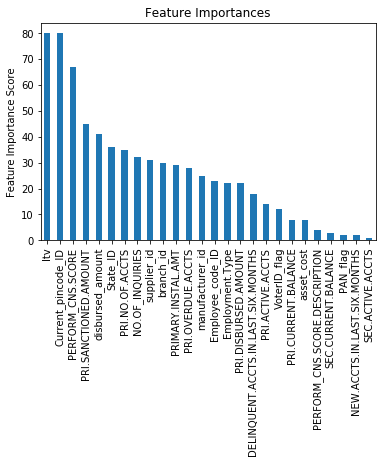

In [138]:
modelfit(XGBClassifier(), X_train,y_train,X_validation,y_validation,test_df,sub_df,predictors,outcome,useTrainCV=True, cv_folds=5, early_stopping_rounds=50)

In [ ]:
def model_fn(alg, X_train, Y_train, X_test, Y_test, predictor_var, degree,filename,is_poly=True,is_final=True, treemod =True):
    
    #Kfold cross validation
    
    #kf = loo.split(X_train_std[predictor_var])
    kf = KFold(n_splits=5).split(X_train[predictor_var])
    error = []
    for train, test in kf:
        # Filter training data
        train_predictors = (X_train[predictor_var].iloc[train,:])
        
        # The target we're using to train the algorithm.
        train_target = Y_train.iloc[train]
        
        # Training the algorithm using the predictors and target.
        alg.fit(train_predictors, train_target)
        y1 = alg.predict(X_train[predictor_var].iloc[test,:])
        
        #Record error from each cross-validation run
        error.append(np.sqrt(metrics.mean_squared_error(Y_train.iloc[test], y1)))
     
    print ("Cross-Validation RMSE Score : %f" % np.mean(error))
    
    if treemod:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(X_train[predictor_var], label=Y_train.values)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=5,
            metrics='rmse', early_stopping_rounds=50,verbose_eval=True,
            show_stdv=True)
        print('best n_estimator',cvresult.shape[0])
        alg.set_params(n_estimators=cvresult.shape[0])
        
        feat_imp = pd.Series(alg.booster().get_score()).sort_values(ascending=False)
        print(feat_imp.transpose)
        feat_imp.plot(kind='bar', title='Feature Importances')
        plt.ylabel('Feature Importance Score')

    else:
        #Fit the algorithm on the data
        alg.fit(X_train[predictor_var], Y_train)
        
    #Predict training set:
    dtrain_predictions = alg.predict(X_train[predictor_var])
    
    dvalid_predictions = alg.predict(X_test[predictor_var])
    
    if is_final:
        #Print model report:
        print("Writing Final Csv")
        print("\nModel Report")
        print("RMSE_Score_(Train): %f" % np.sqrt(metrics.mean_squared_error(Y_train.values, dtrain_predictions)))
        #print("R2_Score_(Train): %f" % alg.score(X_train[predictor_var],Y_train))
        print("R2_Score_(Train): %f" % metrics.r2_score(Y_train,dtrain_predictions))
        
        df_final = pd.DataFrame()
        df_final['id'] = final_test['id']
        df_final['kda_ratio'] = dvalid_predictions
        #df_final['kda_ratio'] = df_final['kda_ratio'].astype('str')
        df_final.to_csv(filename, index=False)
    
    else:
        #Print model report:
        print("\nModel Report")
        print("RMSE_Score_(Train): %f" % np.sqrt(metrics.mean_squared_error(Y_train.values, dtrain_predictions)))
        #print("R2_Score_(Train): %f" % alg.score(X_train[predictor_var],Y_train))
        print("R2_Score_(Train): %f" % metrics.r2_score(Y_train,dtrain_predictions))
    
        print("RMSE Score (Test): %f" % np.sqrt(metrics.mean_squared_error(Y_test.values, dvalid_predictions)))
        #print("R2 Score (Test): %f" % alg.score(X_test[predictor_var],Y_test))
        print("R2_Score_(Test): %f" % metrics.r2_score(Y_test,dvalid_predictions))
        
        

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVR
model2 = SVR(kernel = 'rbf')

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.tree import DecisionTreeRegressor
model3 = DecisionTreeRegressor(random_state = 50)

from sklearn.ensemble import RandomForestRegressor
model4 = RandomForestRegressor(n_estimators = 270, max_depth=5,
                               min_samples_split=30,min_samples_leaf=12,max_leaf_nodes=30,min_weight_fraction_leaf=0.1,random_state = 50)

from xgboost import XGBRegressor
model5 = XGBRegressor()

from sklearn.neighbors import KNeighborsRegressor
model6 = KNeighborsRegressor(n_neighbors =37)

from sklearn.linear_model import Ridge, Lasso ,ElasticNet

model7 = Ridge()

model8 = Lasso(max_iter=1000,alpha=2000)

model9 = RandomForestRegressor()

model10 = ElasticNet()

from vecstack import stacking



In [ ]:
model_fn(model4,final_train[predictor_var],final_train[outcome_var],
         final_test[predictor_var],final_test[outcome_var],predictor_var,
         3,'alg2.csv', False, True, False)